<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizado de Máquina e Mineração de Dados
## Lista Prática de Análise de Dados

Professor _Marco Cristo_ 

**Aluno**: Mikael Souza Silva

__Introdução__: Neste trabalho, vamos analisar dados do INEP sobre o ENADE 2017. Estes dados estão organizados em uma releção com as informações do candidato necessárias para realizar a prova, além das suas notas e as respostas que os candidatos deram a questionários sobre a prova, seus dados pessoais e curso realizado. Em anexo, ao fim deste notebook, temos uma descrição detalhada das informações obtidas. 

#### Preliminares

In [1]:
# usar versão do Python 3.x

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sys

In [2]:
print('Python', sys.version)
print('--------')
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('SKLearn:', sklearn.__version__)

Python 3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]
--------
Pandas: 0.24.2
Numpy: 1.16.4
SKLearn: 0.21.2


In [38]:
def bp(data, by, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(6, 6))
    data.boxplot(by=by, ax=ax, showmeans=True)
    _ = plt.suptitle('')
    _ = plt.title(title)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)

In [39]:
# Caminho do arquivo
egeral = pd.read_csv('../data/enade2017_Fisica.csv', sep=';') 

In [40]:
egeral.describe()

,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_MODALIDADE,NU_IDADE,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,NT_GER,NT_FG,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
count,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3570.000000,3570.000000,...,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,1500.868678,1.637329,10027.316848,0.909472,27.482258,2007.729254,2012.741269,3.056720,39.936162,53.520644,...,4.910684,4.700172,4.720563,4.643021,4.711086,4.914130,4.897473,5.022114,4.748420,4.648191
std,3085.326989,1.226826,1.527345,0.286977,7.105561,6.060729,2.121545,1.079496,13.789994,18.059580,...,1.419609,1.563827,1.490476,1.525355,1.462875,1.322178,1.935204,1.544262,1.718615,1.598624
min,1.000000,1.000000,10019.000000,0.000000,18.000000,1965.000000,2000.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,338.000000,1.000000,10028.000000,1.000000,23.000000,2006.000000,2012.000000,2.000000,30.500000,41.725000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,579.000000,1.000000,10028.000000,1.000000,25.000000,2010.000000,2013.000000,3.000000,39.000000,54.600000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1146.000000,2.000000,10028.000000,1.000000,30.000000,2012.000000,2014.000000,4.000000,48.900000,66.675000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,18506.000000,7.000000,10028.000000,1.000000,69.000000,2016.000000,2017.000000,4.000000,87.000000,97.600000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### Análise de valores faltantes

<div class="alert alert-info">
<b>1</b> - Que colunas possuem campos nulos em **egeral**?
</div>

Há muitas formas de fazer isso em Pandas, como por exemplo através da utilização do método isnull()

### Reposta 1:

In [41]:
# Colunas com dados faltando:
colunas_faltantes = egeral.isnull().any()
print(egeral.columns[colunas_faltantes])

Index(['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_FG_D1', 'NT_FG_D1_PT',
       'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE',
       'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'QE_I01',
       'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08',
       'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15',
       'QE_I16', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26', 'QE_I27', 'QE_I28', 'QE_I29',
       'QE_I30', 'QE_I31', 'QE_I32', 'QE_I33', 'QE_I34', 'QE_I35', 'QE_I36',
       'QE_I37', 'QE_I38', 'QE_I39', 'QE_I40', 'QE_I41', 'QE_I42', 'QE_I43',
       'QE_I44', 'QE_I45', 'QE_I46', 'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50',
       'QE_I51', 'QE_I52', 'QE_I53', 'QE_I54', 'QE_I55', 'QE_I56', 'QE_I57',
       'QE_I58', 'QE_I59', 'QE_I60', 'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64',
       'QE_I65', 'QE_I66', 'QE_I67', 'QE_I68'],
      dtype='object')


<div class="alert alert-info">
<b>2</b> - Substitua dados faltantes por valores razoáveis. No caso dos questionários, as colunas até QE_I26 podem ser substituídas por um 'Z'. As colunas após a QE_I26 podem ser substituídas por 7 (7 = _Não sei responder_).
</div>

No caso das notas, se elas forem NaN, podemos substituí-las por 0. Após isso, imprima o vetor resultante para confirmar se não há mais valores NaNs

### Resposta 2:

In [42]:
# Filtrando colunas de questionários
colunas = egeral.columns
questionario = list(filter(lambda x: x.startswith('QE_'), colunas))
print("10 primeiras colunas de questionário:",questionario[:10])

10 primeiras colunas de questionário: ['QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10']


In [43]:
# Substituição dos valores do questionário
# Questionário 16 tem um valor não catalogado.
# Nos valores NaN, vou adicionar a moda dos valores por estar
# Dentro de um conjunto de questões categóricas.
egeral['QE_I16'] = egeral['QE_I16'].fillna(egeral['QE_I16'].mode())

# Substuindo o resto:
egeral[questionario[:26]] = egeral[questionario[:26]].fillna('Z')
egeral[questionario[26:]] = egeral[questionario[26:]].fillna(7)
egeral[questionario].head()

,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,A,D,A,A,D,B,D,B,A,A,...,6.0,6.0,5.0,4.0,4.0,2.0,2.0,6.0,6.0,4.0
1,A,D,A,B,B,B,D,A,A,A,...,5.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0
2,A,C,A,D,D,A,C,A,A,A,...,2.0,4.0,1.0,5.0,2.0,4.0,1.0,5.0,6.0,6.0
3,B,D,A,C,A,C,C,C,E,E,...,6.0,6.0,3.0,6.0,6.0,6.0,6.0,6.0,3.0,4.0
4,B,A,A,D,D,C,D,F,F,D,...,4.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0


In [44]:
# Verificando quais colunas sobraram com valores faltantes:
filtro_colunas_na = list(egeral.isnull().any())
colunas_com_na = egeral.columns[filtro_colunas_na]
colunas_com_na

Index(['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_FG_D1', 'NT_FG_D1_PT',
       'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE',
       'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3'],
      dtype='object')

In [45]:
# Aparentemente alguns alunos estão sem as notas da prova
# Isso pode ser devido a um erro dos dados, ou os alunos não estavam presentes na prova.
# Verificarei quantos alunos estão sem a nota da prova.
filtro_alunos_sem_nota = egeral[colunas_com_na].isnull().any(axis=1)
alunos_sem_nota = egeral[filtro_alunos_sem_nota]
print("Quantidade de alunos sem nota: {}".format(len(alunos_sem_nota)))

Quantidade de alunos sem nota: 9


In [46]:
# Uma coisa interessante é que não existe alunos com apenas algumas notas faltando.
# Todos eles não tem nenhuma das notas da prova, o que indica que eles faltaram a prova.
alunos_sem_nota[colunas_com_na].isna().all(axis=1)

3570    True
3571    True
3572    True
3573    True
3574    True
3575    True
3576    True
3577    True
3578    True
dtype: bool

In [47]:
# Devido a isso, temos duas opções: Remover estes alunos da base de dados
# Para estudar o comportamento apenas dos alunos que participaram, ou dar
# A nota 0 para estes alunos que faltaram e contar com eles na análise de todos os alunos.
# Como esses alunos sem nota são um número pequeno comparado com a quantidade total de alunos
# 9 comparado com 3579 então darei a estes alunos a nota 0 pois os mesmo não terão muita
# Influência no resultado das análises posteriores.

egeral[colunas_com_na] = egeral[colunas_com_na].fillna(0)
egeral[colunas_com_na].iloc[alunos_sem_nota.index]

,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NT_FG_D1,NT_FG_D1_PT,NT_FG_D1_CT,NT_FG_D2,NT_FG_D2_PT,NT_FG_D2_CT,NT_CE,NT_OBJ_CE,NT_DIS_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3
3570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Verificando se tem alguma coluna com valor NaN
# Caso exista, a soma abaixo gera um valor maior que 0
sum(egeral.isnull().any())

0

#### Consultando os dados e comparando distribuições

<div class="alert alert-info">
<b>3</b> - Considerando as distribuições de notas, quem se saiu melhor, os alunos da modalidade presencial ou à distância? _Dica_: boxplots são ótimos para comparar distribuições
</div>

Para várias questões a partir daqui, vamos eventualmente usar um dataframe extra, onde criamos colunas novas, em geral, que servem para fornecer descrição para outra colunas.

In [49]:
data = egeral.copy()
# Escolhendo colunas
colunas = ['NT_GER', 'CO_MODALIDADE']
data = data[colunas]

In [50]:
# Modalidades:
# 0 - Distância
# 1 - Presencial
notas_dist = data[data['CO_MODALIDADE'] == 0]['NT_GER']
notas_pres = data[data['CO_MODALIDADE'] == 1]['NT_GER']

In [51]:
# Transformando dados numéricos para categorias
data['CO_MODALIDADE'] = data['CO_MODALIDADE'].apply(lambda x: 'Distância' if x == 0 else 'Presencial')

In [52]:
# Verificando distribuição dos dados
data.groupby(by='CO_MODALIDADE').describe()

NT_GER                                                     
                count       mean        std  min   25%   50%     75%   max
CO_MODALIDADE                                                             
Distância       324.0  37.679938  14.300124  0.0  27.4  36.3  45.875  82.4
Presencial     3255.0  40.050323  13.862370  0.0  30.7  39.3  49.000  87.0

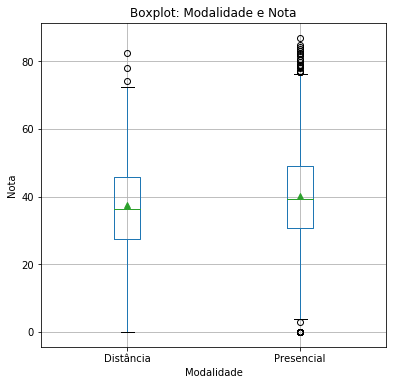

In [53]:
bp(data, 'CO_MODALIDADE', 'Boxplot: Modalidade e Nota', 'Modalidade', 'Nota')

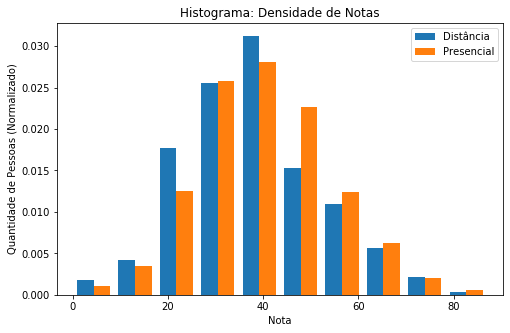

In [54]:
# Plotando histograma de densidade
fig, ax = plt.subplots(figsize=(8,5))
plt.hist([notas_dist, notas_pres], density=True, bins=10)
_ = plt.title('Histograma: Densidade de Notas')
_ = plt.xlabel("Nota")
_ = plt.ylabel("Quantidade de Pessoas (Normalizado)")
_ = plt.legend(["Distância", "Presencial"])

Explique os resultados obtidos.

### Resposta 3:

Com o gráfico de caixa, podemos ver que a média dos alunos da modalidade presencial é maior que a média dos alunos a distância. É notável também que embora as notas dos alunos da modalidade presencial sejam mais distantes da média, temos uma maior concentração de notas acima do limite que considera outliers.

Olhando para o histograma de densidade, podemos confirmar que os alunos da modalidade presencial tendem a tirar notas maiores que os alunos da modalidade a distância, pois há uma maior porcentagem de alunos da modalidade presencial com nota acima de 40 comparados com os alunos da modalidade a distância.

<div class="alert alert-info">
<b>4</b> - Novamente considere as distribuições de notas. Como se comparam os alunos do turno noturno com os dos demais turnos? Há mais alunos estudando ao dia ou à noite? 
</div> 

In [55]:
# Novo dataframe
data = egeral.copy()
colunas = ['NT_GER', 'CO_TURNO_GRADUACAO']
data = data[colunas]
data.head()

,NT_GER,CO_TURNO_GRADUACAO
0,12.1,1.0
1,25.1,1.0
2,47.3,1.0
3,24.4,4.0
4,64.9,4.0


In [56]:
# Quantidade de alunos no total
print("Quantida de alunos: ", len(data))

Quantida de alunos:  3579


In [57]:
# Transformando dados numéricos para categorias
categorias = ['Matutino', 'Vespertino', 'Integral', 'Noturno']
data['CO_TURNO_GRADUACAO'] = data['CO_TURNO_GRADUACAO'].apply(lambda x: categorias[int(x) - 1])

In [58]:
# Dados sobre turnos
data.groupby(by='CO_TURNO_GRADUACAO').describe()

NT_GER                                                   \
                     count       mean        std  min     25%   50%     75%   
CO_TURNO_GRADUACAO                                                            
Integral             928.0  40.665948  14.035016  0.0  31.375  40.0  50.125   
Matutino             510.0  39.046863  14.167813  0.0  29.800  37.5  47.450   
Noturno             1682.0  40.222354  13.886250  0.0  30.900  39.4  49.000   
Vespertino           459.0  37.616993  13.268244  0.0  28.450  36.1  46.800   

                          
                     max  
CO_TURNO_GRADUACAO        
Integral            79.7  
Matutino            87.0  
Noturno             82.9  
Vespertino          84.7

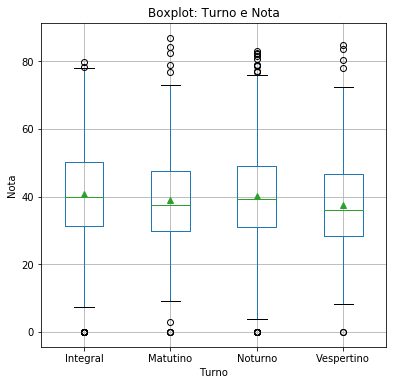

In [59]:
# Plotando gráfico
bp(data, 'CO_TURNO_GRADUACAO', 'Boxplot: Turno e Nota', 'Turno', 'Nota')

Explique os resultados obtidos.

### Resposta 4:

**4.1:** O turno noturno, em média, tem notas maiores que os turnos matutino e vespertino, mas se sai pior que o turno integral.

O turno noturno, quando comparado ao turno integral, tem um número maior de outliers. Isso pode indicar que existe uma maior variabilidade entre as notas dos alunos do turno noturno, enquanto os alunos de tempo integral tendem a tirar notas mais próximas da média.

**4.2:** Existem 3579 na base de dados, sendo 1682 do período noturno e 1897 dos turnos restantes combinados, portanto, se considerarmos o período integral como manhã e tarde, há um número maior de alunos estudando ao dia que à noite.

<div class="alert alert-info">
<b>5</b> - Em geral, o MEC acredita que **não** há importantes diferenças de desepenho entre alunos quotistas e não quotistas. Isto é o que você observa, considerando as distribuições de notas dos dois grupos? _Dica_: não são quotistas os alunos que responderam A à pergunta QE_I15.
</div>

In [60]:
colunas = ['NT_GER', 'QE_I15']
data = egeral[colunas]
data.head()

,NT_GER,QE_I15
0,12.1,D
1,25.1,C
2,47.3,A
3,24.4,B
4,64.9,A


In [61]:
# Removendo dados com Z por não ter resposta
data = data.drop(data[data['QE_I15'] == 'Z'].index)

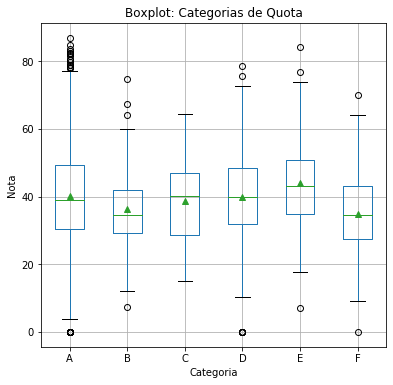

In [62]:
# Plotando gráfico
bp(data, 'QE_I15', 'Boxplot: Categorias de Quota', 'Categoria', 'Nota')

In [63]:
# Juntando alunos cotistas em uma categoria:
data['QE_I15'] = data['QE_I15'].apply(lambda x: 'Q' if x != 'A' else 'A')

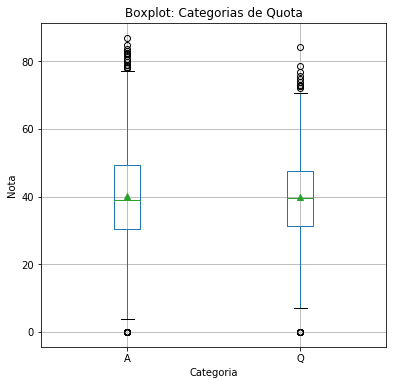

In [64]:
# Plotando Gráfico
bp(data, 'QE_I15', 'Boxplot: Categorias de Quota', 'Categoria', 'Nota')

Explique os resultados obtidos.

<div class="alert alert-info">
<b>6</b> - Como se comparam os desempenhos dos alunos de instituíções públicas, privadas sem fim lucrativo e privadas com fim lucrativo?
</div>

In [65]:
data = egeral.copy()
colunas = ['NT_GER', 'CO_CATEGAD']
data = data[colunas]
data.head()

,NT_GER,CO_CATEGAD
0,12.1,1
1,25.1,1
2,47.3,1
3,24.4,1
4,64.9,1


In [66]:
# Removendo dados com 7 por não ter resposta
data = data.drop(data[data['CO_CATEGAD'] == 7].index)

In [67]:
sorted(data['CO_CATEGAD'].unique())

[1, 2, 3, 4, 5]

In [68]:
categorias = ['Pública\nFederal', 'Pública\nEstadual', 'Pública\nMunicipal',
              'Privada\ncom FL', 'Privada\nsem FL', 'Especial']
data['CO_CATEGAD'] = data['CO_CATEGAD'].apply(lambda x: categorias[x - 1])

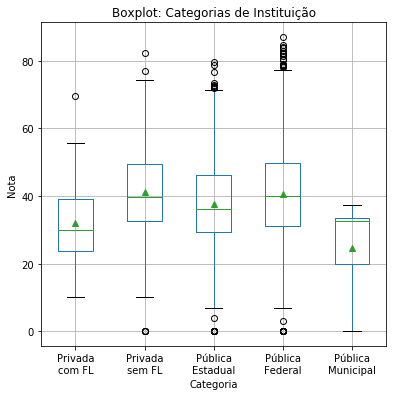

In [69]:
# Plotando gráfico
bp(data, 'CO_CATEGAD', 'Boxplot: Categorias de Instituição', 'Categoria', 'Nota')

Comente sobre os resultados obtidos.

#### Cruzando dados

Os motivos elencados para descrever o que leva um candidato a escolher seu curso incluem:

A = Inserção no mercado de trabalho.<br>B = Influência familiar.<br>C = Valorização profissional.<br>D = Prestígio Social.<br>E = Vocação.<br>F = Oferecimento do curso na modalidade a distância.<br>G = Baixa concorrência para ingresso.<br>H = Outro motivo. 

<div class="alert alert-info">
<b>7</b> - Cruze a informação sobre o turno do curso do aluno com a resposta dada a esta pergunta (QE_I25), de forma a obter, para os motivos dados, o percentual de alunos que os escolheram, de acordo com os cursos realizados.
</div>

Comente sobre os resultados obtidos.

Considerando as seguintes faixas de renda (QE_I08):

A = Até 1,5 salário mínimo (até R\$ 1.086,00).<br>B = De 1,5 a 3 salários mínimos (R\$ 1.086,01 a R\$ 2.172,00).<br>C = De 3 a 4,5 salários mínimos (R\$ 2.172,01 a R\$ 3.258,00).<br>D = De 4,5 a 6 salários mínimos (R\$ 3.258,01 a R\$ 4.344,00).<br>E = De 6 a 10 salários mínimos (R\$ 4.344,01 a R\$ 7.240,00).<br>F = De 10 a 30 salários mínimos (R\$ 7.240,01 a R\$ 21.720,00).<br>G = Acima de 30 salários mínimos (mais de R\$ 21.720,01).

<div class="alert alert-info">
<b>8</b> - É verdade que, quando comparado às instituíções privadas, estão nos cursos das universidades federais tanto os estudantes mais pobres quanto os mais ricos do país?
</div>

Comente sobre os resultados.

#### Obtendo valor consolidado sobre dados cruzados (pivô)

Considerando como foi o ensino médio dos alunos, de acordo com as opções em QE_I17:

A = Todo em escola pública.<br>B = Todo em escola privada (particular).<br>C = Todo no exterior.<br>D = A maior parte em escola pública.<br>E = A maior parte em escola privada (particular).<br>F = Parte no Brasil e parte no exterior.

<div class="alert alert-info">
<b>9</b> - Qual a nota geral média dos alunos, de acordo com a forma como ele cursou ensino médio?
</div>

Comente sobre os resultados.

<div class="alert alert-info">
<b>10</b> - Qual a nota geral média dos alunos, de acordo com sua renda, por regiao? Caso sua base se refira a uma única região, considere a renda por estado daquela região.
</div>

Explique os resultados.

#### Agrupando e ordenando dados

<div class="alert alert-info">
<b>11</b> - Qual o ranking dos estados de acordo com a nota média obtida por alunos, considerando apenas instituições públicas?
</div>

Explique os resultados obtidos.

#### Comportamentos anômalos

<div class="alert alert-info">
<b>12</b> - Como se comparam as variáveis **idade**, **nota geral**, **ano de início da graduação** e **ano de fim do ensino médio** em termos de anomalias?
</div>

Dica: Utilize BOXPLOT ou histograma para facilitar o entendimento.

Comente sobre os resultados.

#### Engenharia de atributos

As questões QE_I27 a QE_I68 nos permitem avaliar quão boa é a instituição de acordo com a visão dos estudantes. Ela deve ser calculada como:

NT_INST = $\frac{1}{N} \sum_{i=27}^{68} \frac{f(\text{QE_I}_i) - 1}{5}$

onde $f$ é uma função que retorna o valor de QE_I$_i$ se ele estiver entre 1 a 6; ela retorna 1, caso contrário. $N$ é o total de questões, entre QE_I27 a QE_I68, que tiveram nota entre 1 a 6.

<div class="alert alert-info">
<b>13</b> - Seguindo a definição dada, crie a coluna NT_INST que reflete a nota que cada estudante daria para a instituição. 
</div>    

#### Preparando dados para classificação

Queremos tentar prever a nota de um aluno apartir das seguintes informações:

* CO_CATEGAD, CO_ORGACAD, CO_MODALIDADE, CO_UF_CURSO, REGIAO,  
* NU_IDADE, TP_SEXO, CO_TURNO_GRADUACAO, 
* QE_I01, QE_I02, QE_I03, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11, QE_I12, QE_I13, QE_I14, QE_I15, QE_I17, QE_I18, QE_I19, QE_I20, QE_I21, QE_I22, QE_I23, QE_I24, QE_I25, QE_I26 
* NT_INST

<div class="alert alert-info">
<b>14</b> - Prepare os dados para aprendizado, convertendo strings para dados categóricos, dados categóricos não binários para hot-vectors e padronizando dados numéricos usando Z-score.
</div> 

## Questão bônus 
### Classificação

Se você gerou os dados corretamente, você pode agora tentar prever, dado um aluno, se ele vai passar ou não no ENADE:

In [35]:
# imports a serem utilizados

# utilize a train_test_split para separar o treino e teste
from sklearn.model_selection import train_test_split

# utilize o Random Forest
from sklearn.ensemble import RandomForestClassifier

In [36]:
### Implemente seu treinamento e inferência:

In [37]:
# utilize a matriz de confusão para auxiliar na interpretação dos resultados
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

NameError: name 'clf' is not defined

<div class="alert alert-info">
<b>15</b> - Que atributos a RandomForest julgou mais relevantes para determinar se o aluno vai ou não passar?
</div>